# Creating a Correlation Graph for A and B Channel Data

``` Implemented in src.data.purpleair_outlier_remover```

Purpose is to create a 4 by 4 grid of correlation plots of each sensor

- X is B PM2.5_atm, Y is A Pm2.5_atm
- 24 hour average
- Mark outliers red that 1) exceed absolute difference 5 ug/m3 and/or 2) exceed 16% error with channel A baseline

https://cfpub.epa.gov/si/si_public_record_Report.cfm?Lab=CEMM&dirEntryId=348236

## Setup and Importing Data

First import required packages.

In [1]:
import pandas as pd
import seaborn as sns

Then import the preprocessed data. Channel A data is stored in a dataframe named data_A, and channel B data is stored in the dataframe data_B.

In [2]:
data_A = pd.read_parquet('../data/interim/PurpleAir MASTER realtime individual.parquet').drop(columns=['entry_id'])
print('Primary_A imported')
data_B = pd.read_parquet('../data/interim/PurpleAir B MASTER realtime individual.parquet')[['PM2.5_ATM_ug/m3']]
print('Primary_B imported')

Primary_A imported
Primary_B imported


In [10]:
data_A.loc[('PA_II_0ED1','2020-07-01'),]
data_A.loc[('PA_II_0ED1','2020-07-01'),]

,,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,Channel A PM2.5 (ug/m3),lat,lon
sensor_name,created_at,,,,,,,,,,
PA_II_0ED1,2020-07-01 00:00:00-05:00,11.214234,17.415111,21.547604,42834.033426,-45.445682,92.800836,48.937326,17.401462,30.285181,-97.734983


## Performing Resampling on DataFrame

Both of these dataframes use a multiindex consisting of (sensor_name,created_at). So resampling must be performed in a specific way in order to obtain the intend result. If you just use df.resample(), it will average all the sensors together, essentially erasing the sensor_name component of the index. However, we get daily averaged data PER CITY, so we utilize the methods described in this [stackoverflow answer](https://stackoverflow.com/questions/15799162/resampling-within-a-pandas-multiindex) to do exactly that using groupby instructions. I also just appended a .rename() to each line, because it was more convenient than writing another variable assignment (like data_A = data_A.rename()).

In [11]:
data_A

PM1.0_CF1_ug/m3  PM2.5_CF1_ug/m3  \
sensor_name created_at                                                    
PA_II_0D9C  2019-12-31 00:00:00-06:00              NaN              NaN   
            2020-01-01 00:00:00-06:00         9.148278        13.834861   
            2020-01-02 00:00:00-06:00        12.859681        20.693389   
            2020-01-03 00:00:00-06:00         2.121110         2.978492   
            2020-01-04 00:00:00-06:00         1.652295         2.262434   
...                                                ...              ...   
PA_II_E6D8  2020-09-11 00:00:00-05:00         6.660376        10.199513   
            2020-09-12 00:00:00-05:00         8.261611        11.273667   
            2020-09-13 00:00:00-05:00         6.050153         8.314361   
            2020-09-14 00:00:00-05:00         8.748997        12.676017   
            2020-09-15 00:00:00-05:00              NaN              NaN   

                                       PM10.0_CF1_ug/m3  UptimeMinutes  \
sensor_name created_at                                                   
PA_II_0D9C  2019-12-31 00:00:00-06:00               NaN            NaN   
            2020-01-01 00:00:00-06:00         14.895097   37115.000000   
            2020-01-02 00:00:00-06:00         22.503903   38555.000000   
            2020-01-03 00:00:00-06:00          3.166046   40009.802276   
            2020-01-04 00:00:00-06:00          2.403213   41433.216968   
...                                                 ...            ...   
PA_II_E6D8  2020-09-11 00:00:00-05:00         10.894395   26590.333797   
            2020-09-12 00:00:00-05:00         11.628292   28032.000000   
            2020-09-13 00:00:00-05:00          8.612611   29472.000000   
            2020-09-14 00:00:00-05:00         13.164220   30911.894150   
            2020-09-15 00:00:00-05:00               NaN            NaN   

                                        RSSI_dbm  Temperature_F  Humidity_%  \
sensor_name created_at                                                        
PA_II_0D9C  2019-12-31 00:00:00-06:00        NaN            NaN         NaN   
            2020-01-01 00:00:00-06:00 -48.780556      59.916667   37.716667   
            2020-01-02 00:00:00-06:00 -48.769444      60.531944   61.901389   
            2020-01-03 00:00:00-06:00 -49.426743      61.540541   43.268848   
            2020-01-04 00:00:00-06:00 -48.796940      62.089013   30.201669   
...                                          ...            ...         ...   
PA_II_E6D8  2020-09-11 00:00:00-05:00 -75.332406      78.428373   55.204451   
            2020-09-12 00:00:00-05:00 -36.520833      87.895833   47.351389   
            2020-09-13 00:00:00-05:00 -41.208333      89.794444   45.320833   
            2020-09-14 00:00:00-05:00 -60.044568      87.661560   48.487465   
            2020-09-15 00:00:00-05:00        NaN            NaN         NaN   

                                       Channel A PM2.5 (ug/m3)       lat  \
sensor_name created_at                                                     
PA_II_0D9C  2019-12-31 00:00:00-06:00                      NaN       NaN   
            2020-01-01 00:00:00-06:00                13.821972  30.28559   
            2020-01-02 00:00:00-06:00                20.649250  30.28559   
            2020-01-03 00:00:00-06:00                 2.978492  30.28559   
            2020-01-04 00:00:00-06:00                 2.262434  30.28559   
...                                                        ...       ...   
PA_II_E6D8  2020-09-11 00:00:00-05:00                10.157719  30.28941   
            2020-09-12 00:00:00-05:00                11.273667  30.28941   
            2020-09-13 00:00:00-05:00                 8.314361  30.28941   
            2020-09-14 00:00:00-05:00                12.675738  30.28941   
            2020-09-15 00:00:00-05:00                      NaN       NaN   

                                             lon  
sensor_name created_at          

In [12]:
# https://stackoverflow.com/questions/15799162/resampling-within-a-pandas-multiindex
def resample_by_sensor(df):
    grouper = df.groupby([pd.Grouper(level='sensor_name'),pd.Grouper(level='created_at',freq='D')])
    data_averaged = grouper.mean()
    insufficient_timepoints = grouper.count() < grouper.count().max()*0.9
    data = data_averaged[~insufficient_timepoints]
    return data

In [17]:
data_A = resample_by_sensor(data_A).rename(columns={'PM2.5_ATM_ug/m3':'Channel A PM2.5 (ug/m3)'})
data_B = resample_by_sensor(data_B).rename(columns={'PM2.5_ATM_ug/m3':'Channel B PM2.5 (ug/m3)'})

data = pd.concat([data_A,data_B], axis=1, join='inner')
data.loc[('PA_II_0ED1','2020-07-01'),]


,,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,Channel A PM2.5 (ug/m3),lat,lon,Channel B PM2.5 (ug/m3)
sensor_name,created_at,,,,,,,,,,,
PA_II_0ED1,2020-07-01 00:00:00-05:00,11.214234,17.415111,21.547604,42834.033426,-45.445682,92.800836,48.937326,17.401462,30.285181,-97.734983,3332.104538


## Data Analysis

Now that our A and B dataframes are ready, we will combine them and perform some calculations:
1. Do percent error with A data as theoretical
2. Determine if each value is an outlier or not with boolean output
3. Bound of 40 on x-axis and y-axis because some outliers reach the thousands and make it hard to read relevant data

In [6]:
def scatter_facet_grid(data,x_col='Channel B PM2.5 (ug/m3)',y_col='Channel A PM2.5 (ug/m3)', hue='outlier', bound=None):
    if bound is not None:
        data = data.loc[(data[y_col]<bound) &(data[x_col]<bound)]
    g = sns.FacetGrid(data.reset_index().set_index('created_at'), col="sensor_name", hue=hue, palette=['blue','red'], col_wrap=5, ylim=(0,50), xlim=(0,50))
    g.map(sns.scatterplot,x_col,y_col)

PM1.0_CF1_ug/m3  PM2.5_CF1_ug/m3  \
sensor_name created_at                                                    
PA_II_0ED1  2020-07-01 00:00:00-05:00        11.214234        17.415111   
            2020-07-02 00:00:00-05:00         9.328931        16.792361   
            2020-07-03 00:00:00-05:00         5.847944        10.162917   
            2020-07-04 00:00:00-05:00         6.430847        10.435750   
            2020-07-05 00:00:00-05:00         5.296083         8.465444   
            2020-07-06 00:00:00-05:00         7.861611        12.153694   
            2020-07-07 00:00:00-05:00         6.578972        10.881097   
            2020-07-08 00:00:00-05:00        11.232528        18.177403   
            2020-07-09 00:00:00-05:00         9.505444        14.447819   
            2020-07-10 00:00:00-05:00         6.587683         9.803834   
            2020-07-11 00:00:00-05:00         4.496347         6.676000   
            2020-07-12 00:00:00-05:00         6.247761         9.575271   
            2020-07-13 00:00:00-05:00         3.565917         5.903403   
            2020-07-14 00:00:00-05:00         5.653653         9.436875   
            2020-07-15 00:00:00-05:00         5.910264        10.381029   
            2020-07-16 00:00:00-05:00         5.736816         9.672542   
            2020-07-17 00:00:00-05:00         4.645176         8.073397   
            2020-07-18 00:00:00-05:00         3.457208         6.124972   
            2020-07-19 00:00:00-05:00         3.686458         6.433417   
            2020-07-20 00:00:00-05:00         3.569306         5.046903   
            2020-07-21 00:00:00-05:00         2.885153         4.504056   
            2020-07-22 00:00:00-05:00         2.800515         4.264423   
            2020-07-23 00:00:00-05:00         2.699250         3.949333   
            2020-07-24 00:00:00-05:00         4.687875         6.337278   
            2020-07-25 00:00:00-05:00         2.995804         4.733916   
            2020-07-26 00:00:00-05:00         2.836167         4.607028   
            2020-07-27 00:00:00-05:00         3.096500         4.809806   
            2020-07-28 00:00:00-05:00         2.550653         3.953028   
            2020-07-29 00:00:00-05:00         1.927361         3.240681   
            2020-07-30 00:00:00-05:00         3.037830         5.290070   
            2020-07-31 00:00:00-05:00         3.978514         6.404236   

                                       PM10.0_CF1_ug/m3  UptimeMinutes  \
sensor_name created_at                                                   
PA_II_0ED1  2020-07-01 00:00:00-05:00         21.547604   42834.033426   
            2020-07-02 00:00:00-05:00         22.959681   44274.000000   
            2020-07-03 00:00:00-05:00         14.138306   45714.000000   
            2020-07-04 00:00:00-05:00         13.189569   47154.000000   
            2020-07-05 00:00:00-05:00         10.502361   48594.000000   
            2020-07-06 00:00:00-05:00         14.213542   50034.000000   
            2020-07-07 00:00:00-05:00         13.858181   51474.000000   
            2020-07-08 00:00:00-05:00         22.300278   52914.000000   
            2020-07-09 00:00:00-05:00         17.278167   54354.000000   
            2020-07-10 00:00:00-05:00         11.551938   55797.262640   
            2020-07-11 00:00:00-05:00          7.726000   57233.000000   
            2020-07-12 00:00:00-05:00         11.325744   58672.586926   
            2020-07-13 00:00:00-05:00          7.740111   60113.000000   
            2020-07-14 00:00:00-05:00         12.487764   61553.000000   
            2020-07-15 00:00:00-05:00         14.123644   62993.115438   
            2020-07-16 00:00:00-05:00         13.235489   64435.215084   
            2020-07-17 00:00:00-05:00         11.327676   65879.705882   
            2020-07-18 00:00:00-05:00          8.598042   67313.000000   
            2020-07-19 00:00:00-05:00          8.910236   68753.000000   
         

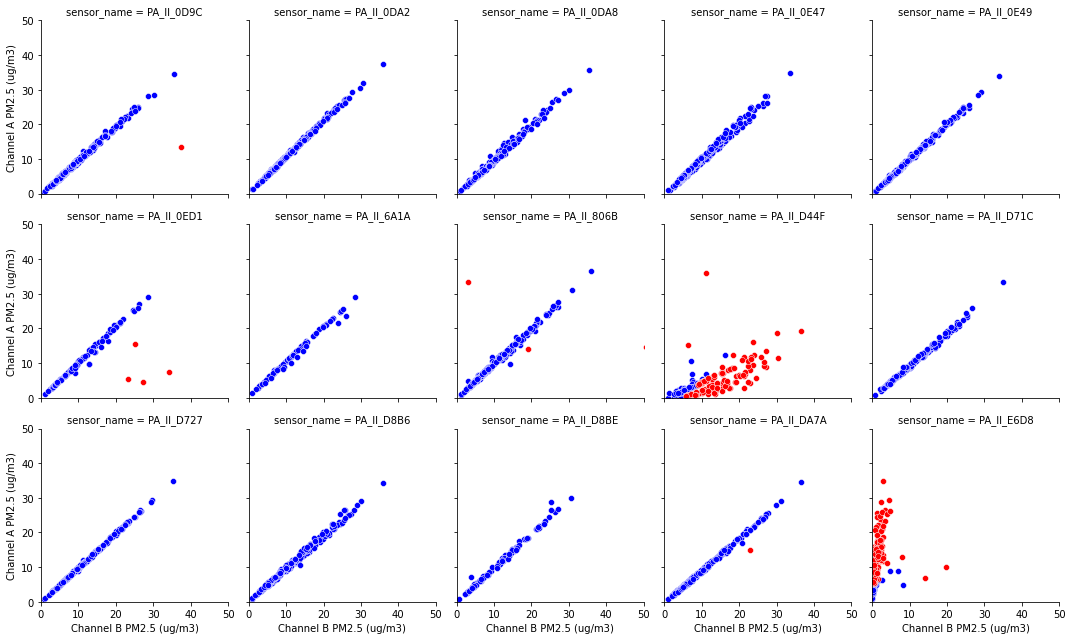

In [23]:
import matplotlib.pyplot as plt
def mark_outliers(data):
    diff =  abs(data['Channel A PM2.5 (ug/m3)']-data['Channel B PM2.5 (ug/m3)'])
    pct_error = diff*100/data['Channel A PM2.5 (ug/m3)']
    data['outlier'] = (diff > 5) & (pct_error > 16)
    return data

marked_data = mark_outliers(data)

scatter_facet_grid(marked_data, bound=70)
plt.savefig('Correlation AB.pdf',dpi=600)
marked_data.loc[('PA_II_0ED1','2020-07'),]


## Use Seaborn to Create a Scatter Facet Grid
https://seaborn.pydata.org/tutorial/axis_grids.html


In [21]:
def remove_marked_outliers(data):
    data_cleaned = data.loc[~data.loc[:,'outlier']]
    return data_cleaned

,,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,Channel A PM2.5 (ug/m3),lat,lon,Channel B PM2.5 (ug/m3),outlier
sensor_name,created_at,,,,,,,,,,,,


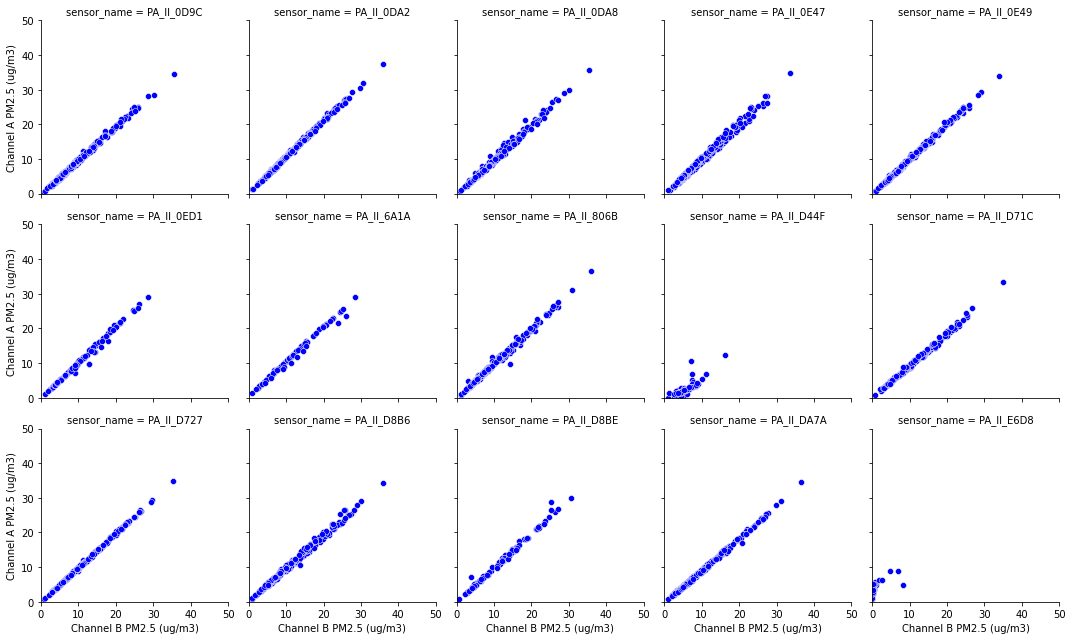

In [22]:
data_cleaned = remove_marked_outliers(data)
scatter_facet_grid(data_cleaned)
data_cleaned.loc[('PA_II_0ED1','2020-07-01'),]


In [241]:
data_cleaned['Channel A PM2.5 (ug/m3)'].max()

3332.4488321678327